Fatemeh Mohammadi - 810199489

# Introduction:

Clustering is a technique that involves grouping similar objects based on their inherent similarities. In other words, the goal is to divide data points into separate clusters such that the points within a cluster are more similar to each other than to those in other clusters. By discovering these natural groupings, clustering algorithms can provide valuable insights into the underlying structure of the data. Clustering is used in various fields including customer segmentation, categorization of images and documents, anomaly detection, and recommendation systems.

## Purpose:

The purpose of this project is to apply clustering algorithms to effectively categorize a dataset of flower images into distinct groups based on their visual similarities. This approach aims to enhance our understanding of the inherent patterns within the data, facilitating improvements in related applications such as image categorization and biodiversity analysis

## Problem Definition

In this project, we intend to use clustering algorithms to analyze images of various flower species. Our goal is to classify these images into different categories based on the data available to us, such that after applying the clustering algorithm, the images are as accurately grouped as possible in their correct clusters.

# Code Overview:

## Import Libraries 

In [1]:
import os
import pickle
from random import randint

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, silhouette_score, homogeneity_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.models import Model

from kneed import KneeLocator
from collections import defaultdict
from math import log2
from math import sqrt

## Parameters

In [2]:
image_folder = 'flower_images'
csv_path = 'flower_images/flower_labels.csv' 
number_of_pixels = 224
data = {}
RGB =3
random_state = 42
MinPts = 2

## Load Datas, Preprocessing and Feature Extraction

In [3]:
model = VGG16()
model.layers.pop()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [4]:
def extract_features(image , model):
    img = img_to_array(image)  
    img = np.expand_dims(img, axis=0) 
    img = preprocess_input(img)  
    features = model.predict(img)  
    return features

In [5]:
def load_and_preprocessing(image_folder):
    for file_name in os.listdir(image_folder):
        if file_name.endswith('.png'):
            img_path = os.path.join(image_folder, file_name)
            img = load_img(img_path, target_size=(number_of_pixels, number_of_pixels))
            features = extract_features(img, model)
            data[file_name] = features.flatten() 

In [6]:
load_and_preprocessing(image_folder)
filenames = np.array(list(data.keys()))
features  = np.array(list(data.values()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━

In [7]:
# Load labels
df = pd.read_csv(csv_path)
labels = df['label'].tolist()
unique_labels = list(set(labels))
print(unique_labels)
print(f'k = {len(unique_labels)}')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
k = 10


## Questions (part 1):

### **Q1: Why is feature extraction important? Why not just use the raw pixel value**

Feature extraction is key because it helps to simplify how we understand and work with large amounts of data. When dealing with images, using just pixel values is not very efficient for a few reasons:

- **Too Many Details**: Images have lots of pixels, which means lots of details. Handling all these details at once can make things complicated and slow for algorithms.
- **Unnecessary Information**: Not every pixel in an image is useful for what we want to do, like recognizing objects. Some pixels might just be background and don't help much.
- **Changes in Appearance**: Pixel values can change if the lighting, size, or angle of the image changes. Feature extraction helps us focus on the important parts that don’t change, making our results more rel### ble.

**Q2: Can you explain three ways to pull out important features fr images?**

- **Color Histograms**: This method looks at the colors in an image and counts how many times each color appears. It’s a simple way to compare images or find objects based on color.
- **Scale-Invariant Feature Transform (SIFT)**: SIFT finds special points in images that stay the same even when the image is zoomed in or out, rotated, or lit differently. These points help match different pictures of the same thing.
- **Histogram of Oriented Gradients (HOG)**: HOG counts how often directions of lines and edges happen in small parts of the image. This method is good for spotting objects like people in photos because it focuses on the shapes for- **Extracting Edge Features:** This involves identifying significant transitions in pixel values which typically represent edges. The article suggests using the Prewitt kernel to detect these edges, transforming the image data into features that capture structural information.
  m### Qby edges.

**Q3: What should we do to get images rey for a model?**

Before putting images into a model, we should prepare them through several steps:

- **Resizing**: Make all images the same size so the model can handle them properly.
- **Normalization**: Adjust the pixel values so they all fit within a similar range. This helps the model treahe model learn better.
- **Color Space Conversion**: Sometimes changing the color setup of an image (like turning color images to black-and-white) can be helpful, depending on the model and wh
  
- **Data Augmentation**: Use techniques like turning, stretching, flipping, or adding noise to images to create a variety of examples. This helps the model learn better.at it needs to do best.

We use something called `preprocess_input` for this project. It’s a step that gets the images in the right form and siande models we use in Keras, making sure our feat.els do their job right.e.

## Clustering 

### K-Means:

#### Find k for k-mean:

In [8]:
range_n_clusters = list(range(2, 15))
sse = []
silhouette_scores = []
homogeneity_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state = random_state)
    cluster_labels = kmeans.fit_predict(features)
    #Elbow Method
    sse.append(kmeans.inertia_)
    
    #Silhouette score: 
    silhouette_scores.append(silhouette_score(features, cluster_labels))  
    
    #Homogeneity score: 
    homogeneity_scores.append(homogeneity_score(labels, cluster_labels))

In [9]:
knee = np.diff(sse, 2) 
optimal_k_elbow = np.argmin(knee) + 2  #because range starts at 2
optimal_k_silhouette = range_n_clusters[np.argmax(silhouette_scores)]
optimal_k_homogeneity = range_n_clusters[np.argmax(homogeneity_scores)]

optimal_k = int((optimal_k_elbow + optimal_k_silhouette + optimal_k_homogeneity)/ 3)

print(f"Optimal k for Elbow Method: {optimal_k_elbow}")
print(f"Optimal k for Silhouette Score: {optimal_k_silhouette}")
print(f"Optimal k for Homogeneity Score: {optimal_k_homogeneity}")
print(f"Avg. of Optimal K(s): {optimal_k}")

Optimal k for Elbow Method: 3
Optimal k for Silhouette Score: 2
Optimal k for Homogeneity Score: 14
Avg. of Optimal K(s): 6


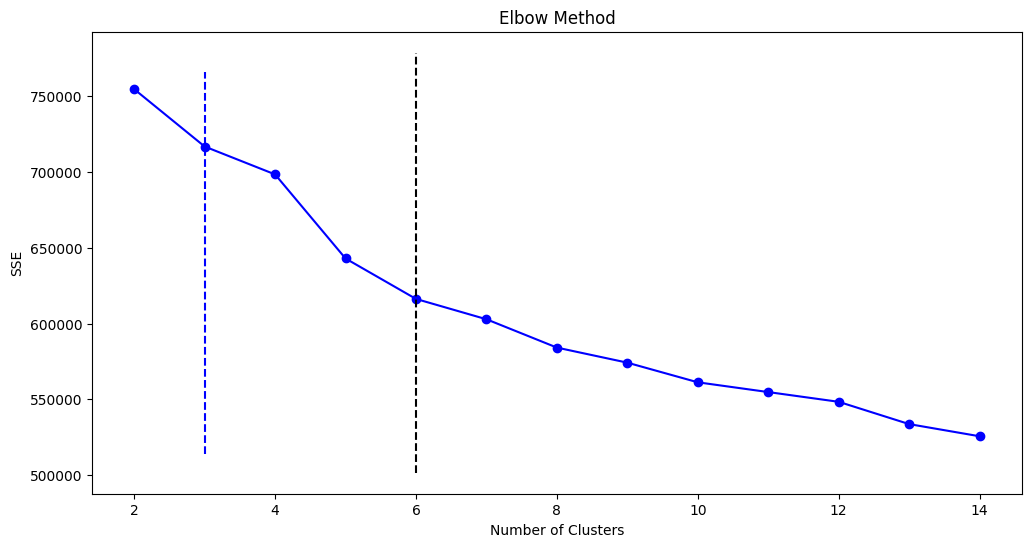

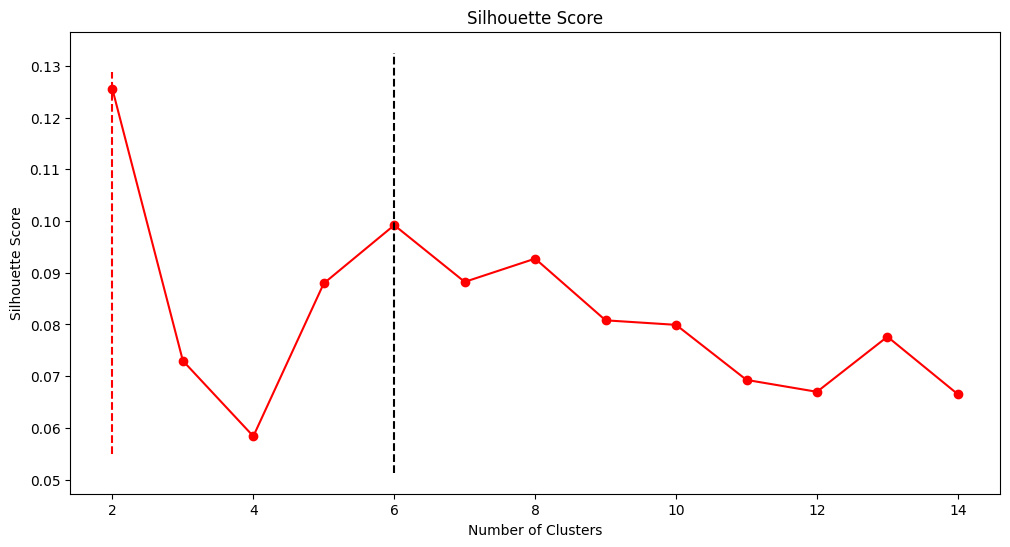

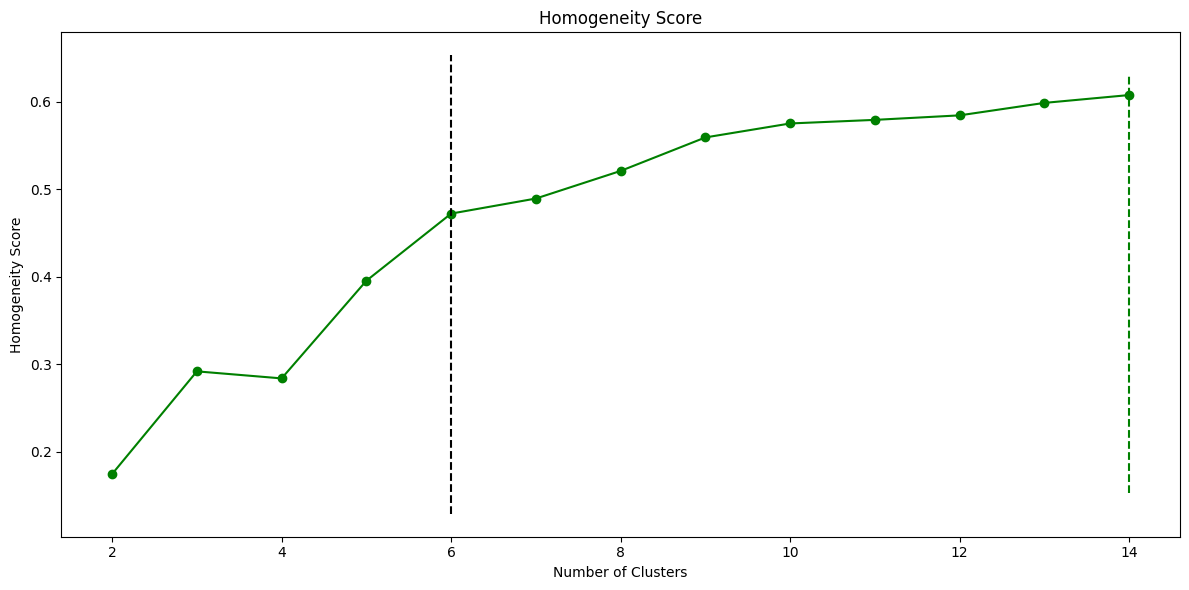

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(range_n_clusters, sse, marker='o', color='blue')
plt.vlines(optimal_k_elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='blue')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color = 'black')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='red')
plt.vlines(optimal_k_silhouette, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='red')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color = 'black')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')


plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, homogeneity_scores, marker='o', color='green')
plt.vlines(optimal_k_homogeneity, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='green')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color = 'black')
plt.title('Homogeneity Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')

plt.tight_layout()
plt.show()

#### Clustering: 

In [11]:
kmeans = KMeans(n_clusters= optimal_k, random_state = random_state)
kmeans.fit(features)

KMeans(n_clusters=6, random_state=42)

In [12]:
kmeans.labels_

array([1, 1, 3, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 3, 3, 0, 1, 1, 2, 2, 3, 4,
       3, 3, 2, 1, 3, 2, 3, 1, 1, 1, 2, 2, 5, 0, 2, 1, 3, 2, 1, 1, 3, 1,
       0, 4, 3, 1, 0, 0, 5, 4, 3, 1, 1, 1, 2, 1, 2, 0, 3, 0, 3, 3, 2, 2,
       1, 1, 3, 4, 2, 3, 1, 0, 2, 1, 1, 2, 0, 5, 1, 4, 5, 2, 0, 2, 3, 4,
       1, 4, 3, 0, 2, 3, 0, 2, 1, 2, 0, 1, 0, 3, 4, 2, 1, 3, 0, 2, 0, 1,
       2, 4, 3, 1, 2, 1, 0, 1, 2, 1, 2, 3, 4, 2, 0, 1, 3, 1, 0, 1, 2, 3,
       0, 4, 4, 0, 1, 1, 3, 4, 1, 4, 1, 2, 3, 3, 1, 4, 5, 5, 3, 4, 3, 2,
       1, 1, 5, 2, 5, 1, 2, 1, 5, 3, 0, 3, 3, 5, 1, 2, 1, 0, 5, 1, 0, 2,
       0, 4, 3, 3, 1, 2, 0, 3, 1, 1, 1, 0, 5, 3, 4, 3, 0, 2, 0, 5, 1, 2,
       3, 4, 5, 1, 2, 1, 4, 3, 1, 4, 1, 5])

In [13]:
groups_kmean = {}
for file, cluster in zip(filenames, kmeans.labels_):
    if cluster not in groups_kmean:
        groups_kmean[cluster] = []
    groups_kmean[cluster].append(file)

### DBSCAN:

#### Find eps:

In [14]:
def find_epsilon(n_neighbors):
    nearest_neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    nearest_neighbors.fit(features)
    distances, indices = nearest_neighbors.kneighbors(features)
    
    sorted_distances = np.sort(distances[:, n_neighbors-1], axis=0)
    
    #find elbow point
    differences = np.diff(sorted_distances, 2) 
    optimal_index = np.argmax(differences) 
    optimal_eps = sorted_distances[optimal_index]
    
    plt.figure(figsize=(10, 5))
    plt.plot(sorted_distances)
    plt.plot(optimal_index, optimal_eps, 'ro')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel('k-th nearest distance')
    plt.title(f'Distance to the {n_neighbors}-th nearest neighbor')
    plt.grid(True)
    plt.show()
    
    print(f"Optimal eps (estimated): {optimal_eps}")
    return optimal_eps

2


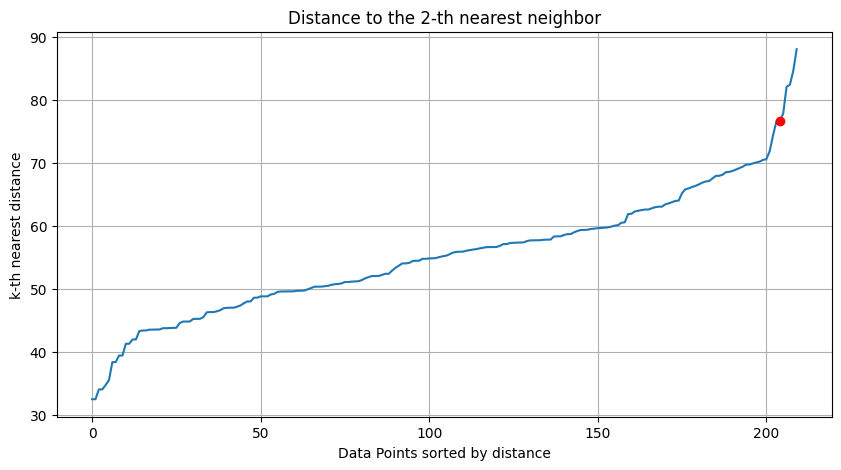

Optimal eps (estimated): 76.69377136230469
3


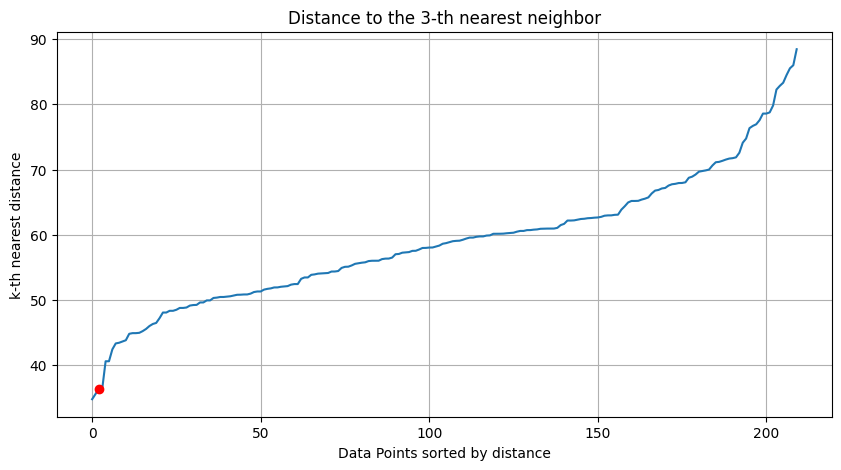

Optimal eps (estimated): 36.4019660949707
4


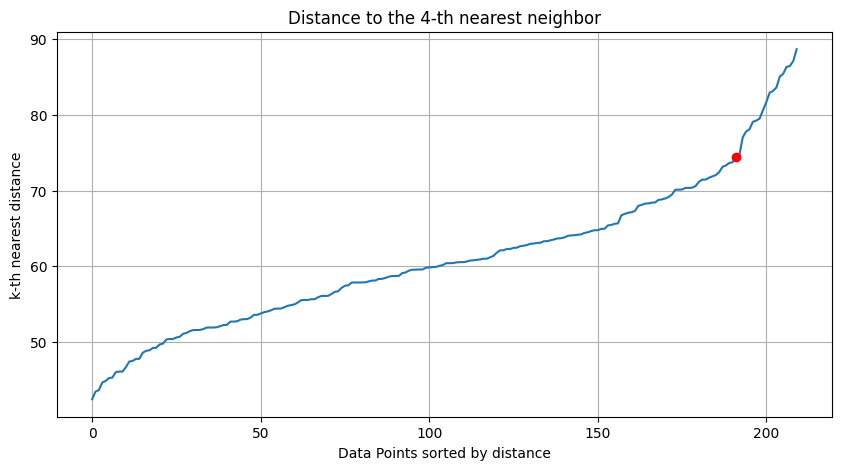

Optimal eps (estimated): 74.44046020507812


In [15]:
n_neigbors_s = [2,3,4]
eps_s = []
for n in n_neigbors_s:
    print(n)
    eps_s.append(find_epsilon(n))

In [16]:
eps = sum(eps_s)/len(eps_s)
print(f"Avg. of optimal eps(s): {eps}")

Avg. of optimal eps(s): 62.51206588745117


#### Clustering: 

In [17]:
dbscan = DBSCAN(eps=int(eps), min_samples = MinPts)
dbscan.fit(features)

DBSCAN(eps=62, min_samples=2)

In [18]:
dbscan.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,  1,  0,  0,
        2,  0,  0,  0,  0, -1,  3,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  3,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,
        0,  0,  4,  0,  3, -1, -1,  0, -1,  0, -1,  2,  0, -1, -1, -1,  0,
       -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  1, -1,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  4,  0,  0,  0,  0,  0,
       -1,  1,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  6, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1,  0,  5,  5,  0,
       -1, -1, -1,  6,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
       -1, -1,  0,  0, -1,  0,  4,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0], dtype=int64)

In [19]:
len(list(set(dbscan.labels_)))

8

In [20]:
groups_dbscan = {}
for file, cluster in zip(filenames, dbscan.labels_):
    if cluster not in groups_dbscan:
        groups_dbscan[cluster] = []
    groups_dbscan[cluster].append(file)

## Questions (part 2):

### Q4: Discuss K-Means and DBSCAN clustering methods, and explain their advantages and disadvantages relative to each other.

**K-Means Clustering:**
- **Advantages:**
  - **Fast and Works Well with Big Data:** K-Means is quick, which makes it good for working with lots of data.
  - **Simple and Clear:** It’s easy to use and understand how it groups data.
- **Disadvantages:**
  - **Needs to Know Cluster Count:** You must tell it how many groups (clusters) to make before it starts.
  - **Doesn't Like Outliers:** Outliers, or very unusual data points, can mess up the grouping.
  - **Struggles with Oddly Shaped Groups:** It doesn’t do well with clusters that aren’t round or are very different in size.

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
- **Advantages:**
  - **Figures Out Cluster Numbers:** It figures out how many groups to make on its own.
  - **Good with Outliers:** It can handle unusual data points without them causing issues.
  - **Finds Clusters of All Shapes:** It can discover groups of any shape.
- **Disadvantages:**
  - **Sensitive to Settings:** The results depend a lot on the settings for distance and the minimum number of points.
  - **Not Great with Different Densities:** It’s not good at finding groups if their density varies a lot.

### Q5: How did you find the best number of clusters in K-Means?

To pick the best number of groups for K-Means, three methods were used:
1. **Elbow Method:** Looked for the point where increasing the number of clusters doesn’t improve much anymore.
2. **Silhouette Method:** Checked how well the data fit into the clusters, aiming for the best fit.
3. **Homogeneity Score:** Made sure the data within a single cluster were similar or related.

Then, the best number was averaged from these three methods to make a well-rounded choice.

### Q6: How did the two clustering methods compare?

In this case, K-Means did a better job than DBSCAN because it matched up with the actual data groups more closely. K-Means was able to clearly identify and organize the data into meaningful clusters based on the project needs.

In [21]:
ari_kmeans = adjusted_rand_score(labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(labels, dbscan.labels_)

print("K-Means Clustering Metrics:")
print("Adjusted Rand Index:", ari_kmeans)
print("\nDBSCAN Clustering Metrics:")
print("Adjusted Rand Index:", ari_dbscan)



K-Means Clustering Metrics:
Adjusted Rand Index: 0.32705224059220184

DBSCAN Clustering Metrics:
Adjusted Rand Index: 0.021328699421614552


In [22]:
def view_cluster(cluster, image_folder, groups):
    plt.figure(figsize=(10, 10))
    file_names = groups[cluster]
    
    for index, file_name in enumerate(file_names):
        img_path = os.path.join(image_folder, file_name)
        plt.subplot(15, 15, index + 1)
        img = load_img(img_path, target_size=(224, 224))
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

def view_clusters(clusters, groups):
    for cluster in clusters:
        print(cluster)
        print ("__________" * 10)
        view_cluster(cluster, image_folder, groups)

0
____________________________________________________________________________________________________


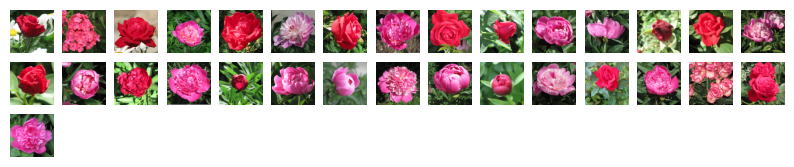

1
____________________________________________________________________________________________________


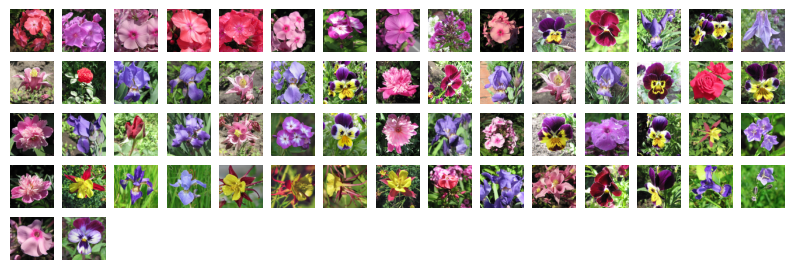

2
____________________________________________________________________________________________________


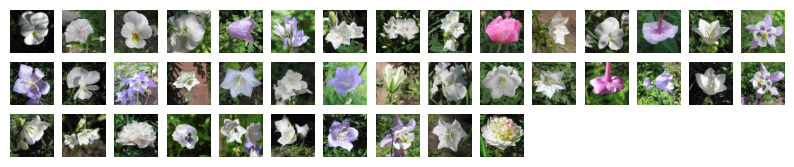

3
____________________________________________________________________________________________________


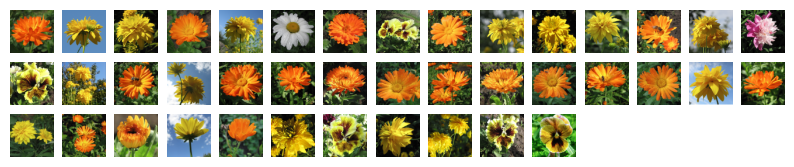

4
____________________________________________________________________________________________________


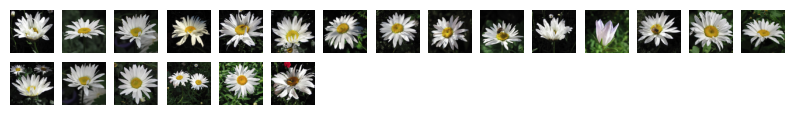

5
____________________________________________________________________________________________________


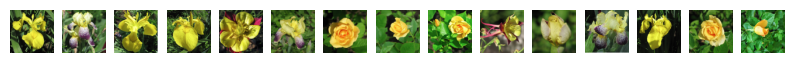

In [23]:
view_clusters(list(set(kmeans.labels_)), groups_kmean)

0
____________________________________________________________________________________________________


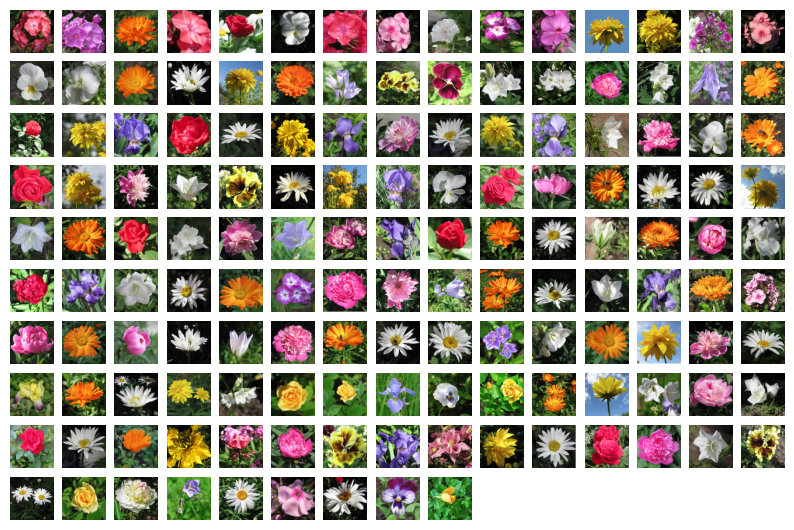

1
____________________________________________________________________________________________________


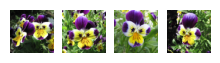

2
____________________________________________________________________________________________________


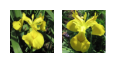

3
____________________________________________________________________________________________________


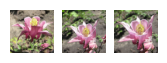

4
____________________________________________________________________________________________________


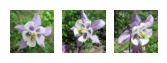

5
____________________________________________________________________________________________________


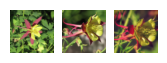

6
____________________________________________________________________________________________________


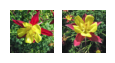

-1
____________________________________________________________________________________________________


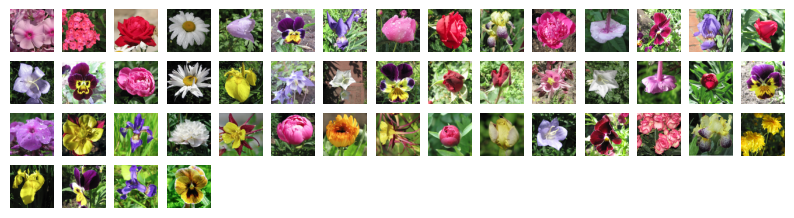

In [24]:
view_clusters(set(dbscan.labels_), groups_dbscan)

## Dimention Reduction


In [25]:
def plot_PCD_2(features, labels, title):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    num_clusters = len(np.unique(labels))
    colors = plt.cm.tab20(np.linspace(0, 1, num_clusters))
    cmap = ListedColormap(colors)

    plt.figure(figsize=(10,5))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=cmap, edgecolor='k', s=50)
    plt.title(f'PCA for {title}')
    plt.colorbar(scatter, ticks=np.arange(num_clusters), label='Cluster Label')
    plt.grid(True)
    plt.show()

In [26]:
def plot_PCD_3(features, labels, title):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)
    
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    
    num_clusters = len(np.unique(labels))
    colors = plt.cm.tab20(np.linspace(0, 1, num_clusters))
    cmap = ListedColormap(colors)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap=cmap, edgecolor='k', s=50)
    plt.title(f'PCA for {title}')
    plt.colorbar(scatter, ticks=np.arange(num_clusters), label='Cluster Label')
    plt.show()


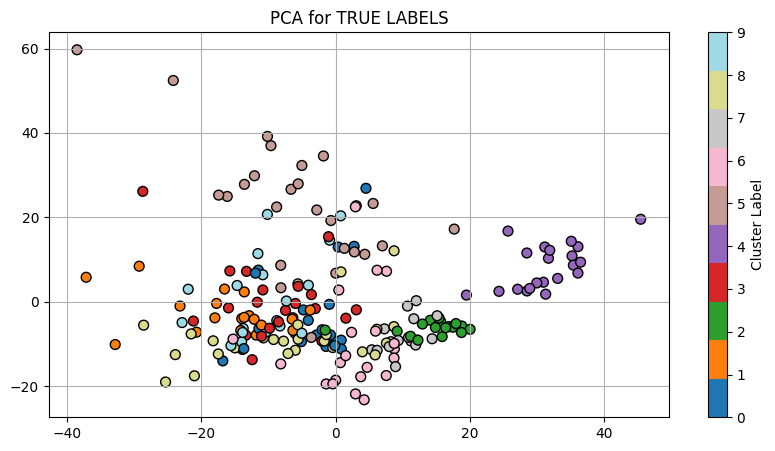

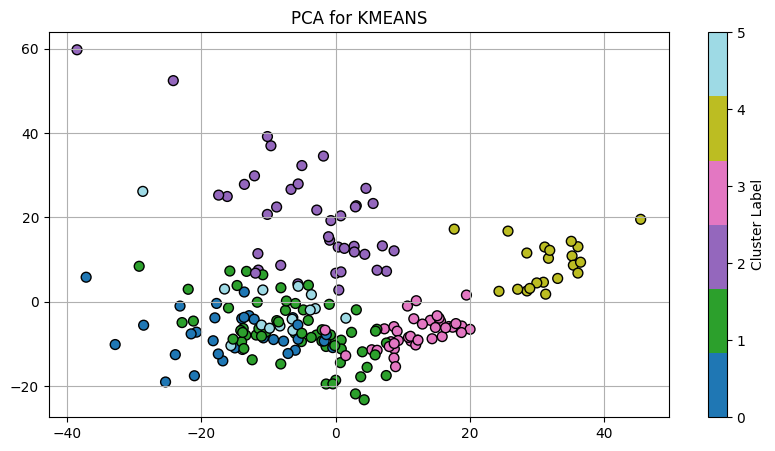

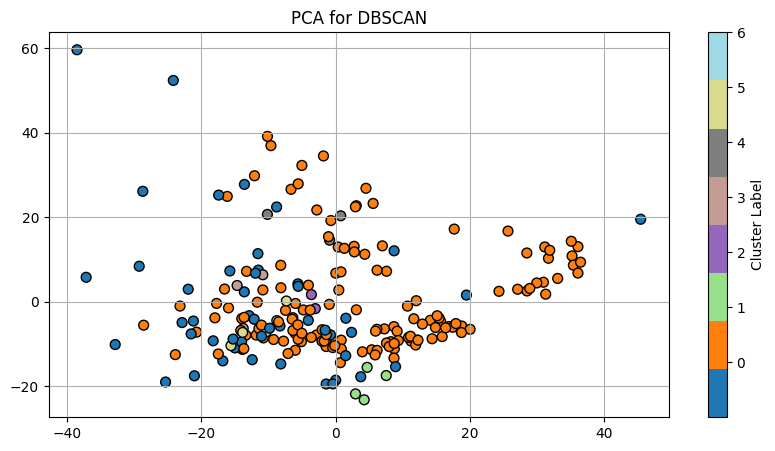

In [27]:
plot_PCD_2(features, labels, "TRUE LABELS")
plot_PCD_2(features, kmeans.labels_, "KMEANS")
plot_PCD_2(features, dbscan.labels_, "DBSCAN")

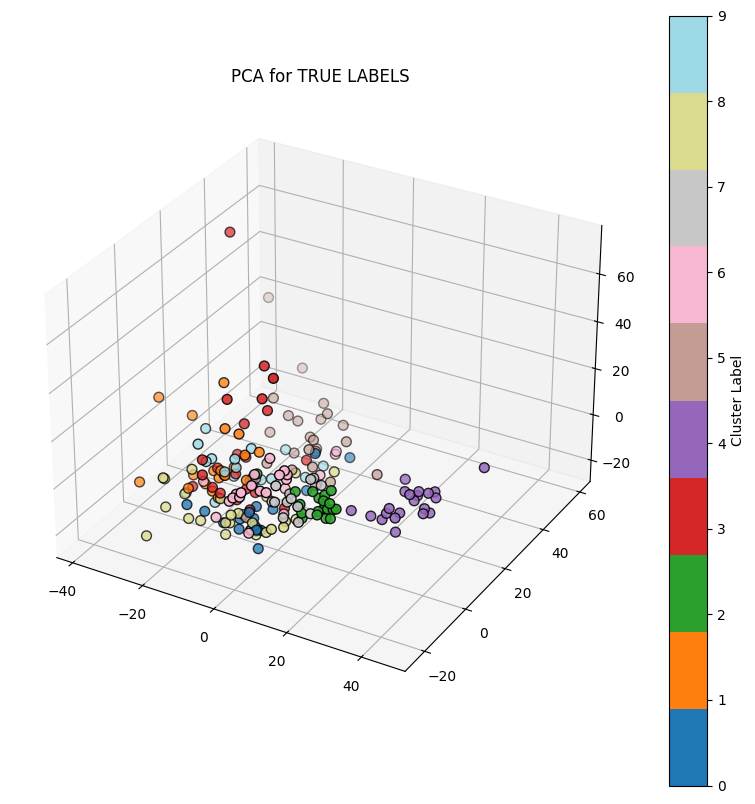

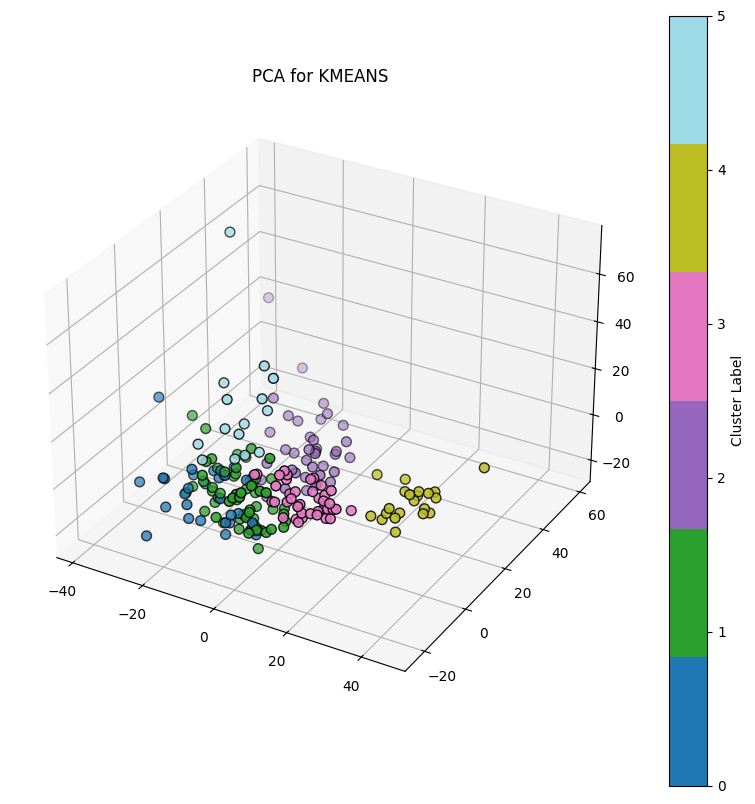

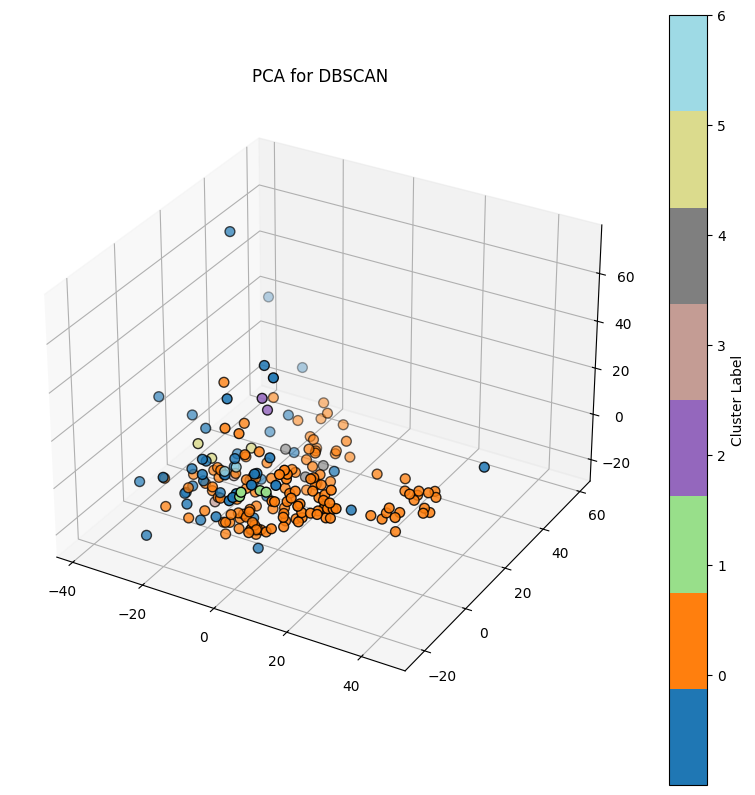

In [28]:
plot_PCD_3(features, labels, "TRUE LABELS")
plot_PCD_3(features, kmeans.labels_, "KMEANS")
plot_PCD_3(features, dbscan.labels_, "DBSCAN")

## Compare the clusters obtained by two algorithms.


**K-Means Clustering:**
- In the picture for K-Means, there are six groups, each with a color.
- The groups made by K-Means are tight and round, which means K-Means is good for simple, ball-shaped groups.
- Each group is separate from the others, but some points on the edges might be in the wrong group because K-Means uses the distance from the center to decide which group a point belongs to.

**DBSCAN Clustering:**
- In the DBSCAN picture, there are seven groups and some points that don't belong to any group, which DBSCAN calls noise.
- The groups in DBSCAN look different and are based on how close the points are to each other, not a set shape like K-Means.
- DBSCAN doesn't group some points on purpose, so it's better at dealing with odd points or noise.

**Comparison:**
- **Shape and Grouping**: K-Means makes all the groups round and about the same size. DBSCAN groups points by how close they are, so the groups can be any shape.
- **Dealing with Odd Points**: K-Means puts every point in a group, even if it doesn’t fit well. DBSCAN is okay leaving s. (which is not suitable for this project.)actually there.
- **Groups Being Close**: The groups in K-Means are clearer and don't mix muc areAN groups can be closer or even . ts your data best.ategories.
points.

## Questions (part 3):

### Q7: Research about PCD and explain how it works.
#### What is Dimensionality Reduction and why do we need it?
Dimensionality reduction is a way to make a large set of data simpler by reducing the number of details (features) we have to look at. This is helpful because it can:
- Save space on your computer.
- Make calculations faster.
- Get rid of unnecessary or duplicate information.

This process helps in making it easier to see patterns and important information in the data, especially when we turn complex data into simpler 2D or 3D graphs. It also helps in cleaning up the data by removing "noise".
#### How does Dimensionality Reduction works (using PCA)?
PCA is a statistical procedure that uses an orthogonal transformation to convert a set of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. It's widely used for:

- **Dimensionality Reduction:** PCA reduces the number of variables while preserving as much information as possible.
- **Visualization:** It enables the visualization of complex data by reducing dimensions to 2D or 3D.
- **Noise Reduction:** By focusing on higher variance components, PCA can filter out noise.
- **Feature Extraction:** PCA transforms a large set of variables into a smaller one that still contains most of the information.

##### Key Concepts

- **Data Transformation:** PCA transforms the data using a covariance matrix, eigenvalues, and eigenvectors.
- **Principal Components:** These are the resulting variables after PCA, capturing the maximum variance in the data.
- **Eigenvalues and Eigenvectors:** Eigenvalues measure variance magnitude along its eigenvector direction.
- **Variance Explained:** PCA ranks components by the level of variance they explain in the data.
- **Normalization:** Standardizing variables is crucial in PCA to prevent variables with larger scales from dominating.

##### Implementation Steps

1. **Standardize the Data:** Normalize the features in the dataset.
2. **Covariance Matrix Computation:** Calculate how features vary with each other.
3. **Eigenvalue Decomposition:** Identify directions where data varies the most.
4. **Select Principal Components:** Choose components with the highest eigenvalues.
5. **Data Transformation:** Project data onto the selected components.


##### Why use PCA?

- It reduces the number of features, making it easier to analyze and visualize the data.
- It helps to identify the most important patterns in the data.
- It can improve the performance of other analyses or models by getting rid of irrelevant information.

## Evaluation

In [29]:
def entropy(labels):
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    total_labels = len(labels)
    return -sum((count/total_labels) * log2(count/total_labels) for count in label_counts.values())

def conditional_entropy(labels, clusters):
    
    cluster_labels = defaultdict(list)
    for label, cluster in zip(labels, clusters):
        cluster_labels[cluster].append(label)
    total_labels = len(labels)
    return sum((len(labels_in_cluster) / total_labels) * entropy(labels_in_cluster) for labels_in_cluster in cluster_labels.values())

def homogeneity(labels, clusters):
    total_entropy = entropy(labels)
    if total_entropy == 0:
        return 1
    return 1 - conditional_entropy(labels, clusters) / total_entropy


In [30]:
def average_distance(point, all_points):
    return sum(math.sqrt(sum((a - b) ** 2 for a, b in zip(point, other))) for other in all_points) / len(all_points)

def silhouette(features, labels):
    clusters = {}
    for point, label in zip(features, labels):
        if label in clusters:
            clusters[label].append(point)
        else:
            clusters[label] = [point]
    all_scores = []
    for point, label in zip(features, labels):
        a = average_distance(point, clusters[label])
        b = min(average_distance(point, clusters[other_label]) for other_label in clusters if other_label != label)
        all_scores.append((b - a) / max(a, b))
    return sum(all_scores) / len(all_scores)


In [31]:
def print_evaluation(features, labels_1, labels_2, title):
    ss = silhouette_score(features, labels_2)
    h = homogeneity(labels_1, labels_2)
    ss_ = silhouette_score(features, labels_2)
    h_ = homogeneity_score(labels_1, labels_2)
    print(f'for {title}: homogeneity_score: {h} (using library: {h_})')
    print(f'for {title}: silhouette_score: {ss} (using library: {ss_})')
    return ss, h

In [32]:
ss_kmean, h_kmean = print_evaluation(features, labels, kmeans.labels_, "KMEANS")
print("____" * 20)
ss_dbscan, h_dbscan = print_evaluation(features, labels, dbscan.labels_, "DBSCAN")

for KMEANS: homogeneity_score: 0.472235722653767 (using library: 0.47223572265376684)
for KMEANS: silhouette_score: 0.09919235855340958 (using library: 0.09919235855340958)
________________________________________________________________________________
for DBSCAN: homogeneity_score: 0.11927647593349189 (using library: 0.1192764759334918)
for DBSCAN: silhouette_score: -0.04119698703289032 (using library: -0.04119698703289032)


## Questions (part 4):

### Q8: Explain How to Calculate Homogeneity and Silhouette Criteria

#### **Homogeneity**
A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This measure checks if each cluster is made up entirely of a single class of data points.

The homogeneity score is calculated as:

$$
h = 1 - \frac{H(C|K)}{H(C)} 
$$

Where:
- $$  H(C|K) $$ is the conditional entropy of the true class distribution given the cluster assignment.
- $$ H(C) $$ is the entropy of the true class distribution.

The homogeneity score ranges from 0 to 1, where 1 stands for perfectly homogeneous clustering.

#### **Silhouette Score**
The silhouette score measures how similar a point is to its own cluster compared to other clusters.

The silhouette score for a single data point is calculated as:

$$ s = \frac{b - a}{\max(a, b)} $$

Where:
- \( a \) is the mean distance between a sample and all other points in the same cluster.
- \( b \) is the mean distance between a sample and all other points in the nearest cluster that the sample is not a part of.

The silhouette score ranges from -1 to 1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

### Q9: Report the Results of the Mentioned Criteria for Each of the Methods
The answer to this question is in the cell above.

### Q10: Suggest Ways to Improve the Performance of the Models

Improving the performance of clustering models can be approached from several angles:

1. **Feature Engineering**: Improve the input features' quality, which might include normalization, handling missing values, or selecting more informative features.
2. **Optimize Parameters**: Tune the parameters of the clustering algorithms, such as the number of clusters in k-means, or bandwidth in mean-shift.
3. **Advanced Algorithms**: Experiment with different clustering algorithms that might be more suited to the particularities of the dataset.
4. **Dimensionality Reduction**: Use techniques like PCA (Principal Component Analysis) to reduce the dimensionality of the data, which might help in improving cluster quality by removing noise and redundancy in the data.
5. **Outlier Detection**: Implement robust methods to identify and handle outliers that could skew the clustering results.


## References:

https://en.wikipedia.org/wiki/Scale-invariant_feature_transform

https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/#:~:text=3%20Beginner-Friendly%20Techniques%20to%20Extract%20Features%20from%20Image,...%203%20Method%20%233%3A%20Extracting%20Edge%20Features%20

https://www.analyticsvidhya.com/blog/2021/02/diminishing-the-dimensions-with-pca/

https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

https://www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

https://chat.openai.com